<a href="https://colab.research.google.com/github/souhirkammoun/MultilayerPerceptronExamples/blob/master/MLPWithMNISTdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

nb_classes = 10

In [2]:
#Load the MNIST Dataset
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# we can look at the shape of the dataset
X_train.shape
# it appears that we have 60,000 samples in our training set, and the images are 28 pixels x 28 pixels each. 

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
#Data preperation
# we want to transform our dataset from having shape (n, width, height) to (n, width *height).
print(X_train.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
#we can convert our data type to float32 and normalize our data values to the range [0, 1].
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print(y_train.shape)
#We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.
# we must Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('First 3 labels: ', y_train[:3])
print('\nFirst 3 labels (one-hot):\n', Y_train[:3])

Instructions for updating:
non-resource variables are not supported in the long term
(60000, 28, 28)
(60000, 784)
(60000,)
First 3 labels:  [5 0 4]

First 3 labels (one-hot):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 1 0]


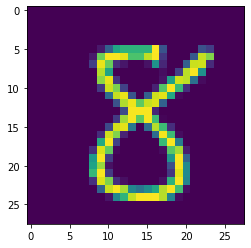

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)
# test the dataset
plt.imshow(X_train[5].reshape(28, 28))
print(np.asarray(range(10)))
print(Y_train[5].astype('int'))

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation("softmax"))


model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [6]:
#Training the model 
network_history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_val, Y_val), verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 15000 samples
Epoch 1/50





45000/45000 [==============================] - 6s 136us/step - loss: 2.2083 - acc: 0.2185 - val_loss: 2.0472 - val_acc: 0.4985
Epoch 2/50
45000/45000 [==============================] - 5s 117us/step - loss: 1.9764 - acc: 0.4498 - val_loss: 1.8108 - val_acc: 0.6781
Epoch 3/50
45000/45000 [==============================] - 5s 121us/step - loss: 1.7554 - acc: 0.5855 - val_loss: 1.5722 - val_acc: 0.7441
Epoch 4/50
45000/45000 [==============================] - 6s 128us/step - loss: 1.5319 - acc: 0.6639 - val_loss: 1.3454 - val_acc: 0.7767
Epoch 5/50
45000/45000 [==============================] - 5s 119us/step - loss: 1.3303 - acc: 0.7073 - val_loss: 1.1507 - val_acc: 0.7999
Epoch 6/50
45000/45000 [==============================] - 5s 118us/step - loss: 1.1634 - acc: 0.7375 - val_loss: 0.9955 - val_acc: 0.8171
Epoch 7/50
45000/450

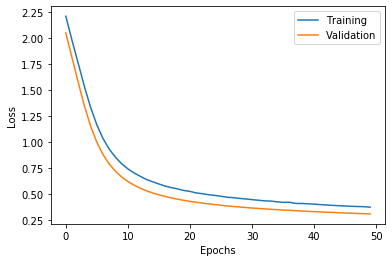

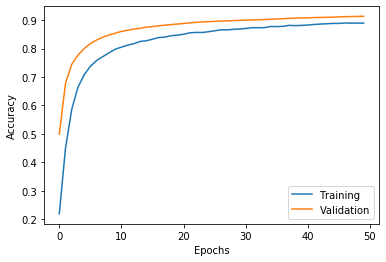

In [7]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

0


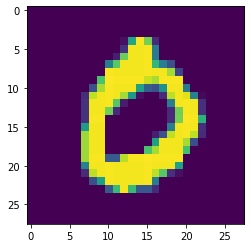

In [8]:
#predection 

from keras.preprocessing import image

plt.imshow(X_test[3].reshape(28, 28))
img = X_test[3].reshape(-1, 784)

prediction = model.predict(img)
print(np.argmax(prediction))